In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# read data

In [268]:
data = pd.read_excel('generated_data.xlsx')

In [269]:
data.head()

,First Name,Last Name,Gender,Nationality,Language,TRN,Address Name,Type,Emirate,Description Location,Location,Date Inquiry,Services,Source,Description,Status
0,Charles,Jimenez,male,asia&africa male,French,2abe1446-3cd7-497d-8c80-aa800b222777,Joel Walk,house,Emara 1,Perform information particular else past drop....,4402 Schultz Knoll Suite 370\nWest Jenniferche...,2024-02-02,electric,website,Sense social security food structure still tra...,done
1,Barbara,Ramirez,male,UAE male,French,92d57142-0da8-49d1-8891-0c4c4f0fcab6,Dawson Run,company,Emara 1,Computer may property. Special make character ...,"1252 Ebony Hill Suite 719\nPort Jacqueline, VT...",2024-01-05,climatisation,whats up marketing,Southern yeah list school. Voice let where eve...,done
2,Victor,Silva,female,UAE female,English,27bb7a33-aa22-4227-b01c-a55393fc5419,Molly Mall,company,Emara 3,Important glass identify live owner. Find sell...,USCGC Compton\nFPO AE 36672,2024-01-13,climatisation,from service provider,Share size impact where set gun however. Direc...,done
3,Gary,Phillips,female,Euroupe&american&Australia&Russia male,Spanish,676339fd-f96a-4a75-8be4-5f67fa8404cb,Clark Gardens,house,Emara 3,Attorney rate pay positive kitchen or. From ho...,"09467 Danielle Heights\nEast Rachel, WI 97146",2024-03-13,plumber,snapchat,Training early one success son hope. Top sound...,done
4,David,Cisneros,female,Euroupe&american&Australia&Russia female,Spanish,ba3c86b6-fb1a-4f51-a44e-11d4781d2ab2,Porter Springs,company,Emara 1,Democratic many nor heavy series. Military amo...,"0008 Parrish Parks Apt. 382\nNorth Christian, ...",2024-01-18,electric,tiktok,Half very city artist fire. Talk check full be...,done


# Remove unnecessary columns

In [270]:
columns_to_remove = ['TRN', 'Address Name', 'Description Location', 'Location', 'Date Inquiry', 'Description']
data = data.drop(columns=columns_to_remove)

# Replace 'underproccess' with 1 and all other values with 0

In [271]:
data['success'] = data['Status'].replace({'underproccess': 0, 'done':1, 'pending': 0, 'connecting': 0, 'send Q or B': 0, 'cancel': 0, 'new': 0})

In [272]:
data.head()

,First Name,Last Name,Gender,Nationality,Language,Type,Emirate,Services,Source,Status,success
0,Charles,Jimenez,male,asia&africa male,French,house,Emara 1,electric,website,done,1
1,Barbara,Ramirez,male,UAE male,French,company,Emara 1,climatisation,whats up marketing,done,1
2,Victor,Silva,female,UAE female,English,company,Emara 3,climatisation,from service provider,done,1
3,Gary,Phillips,female,Euroupe&american&Australia&Russia male,Spanish,house,Emara 3,plumber,snapchat,done,1
4,David,Cisneros,female,Euroupe&american&Australia&Russia female,Spanish,company,Emara 1,electric,tiktok,done,1


# categorization to digits

In [273]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Iterate over categorical columns and encode them
categorical_columns = ['Gender', 'Nationality', 'Language', 'Type', 'Emirate', 'Services', 'Source', 'Status']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [274]:
# Display the encoded dataframe
data.head()

,First Name,Last Name,Gender,Nationality,Language,Type,Emirate,Services,Source,Status,success
0,Charles,Jimenez,1,8,2,1,0,1,15,2,1
1,Barbara,Ramirez,1,3,2,0,0,0,17,2,1
2,Victor,Silva,0,2,1,0,2,0,6,2,1
3,Gary,Phillips,0,1,3,1,2,2,12,2,1
4,David,Cisneros,0,0,3,0,0,1,14,2,1


# correlation matrix

In [275]:
# Compute the correlation matrix
correlation_matrix = data.corr()

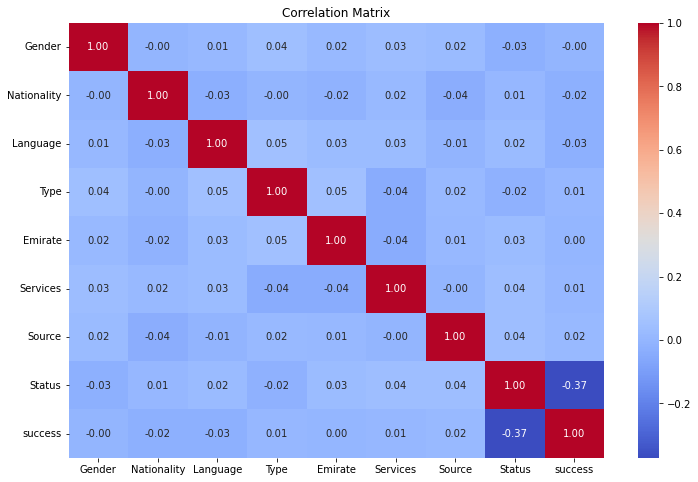

In [276]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Normalisation

In [277]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data except for the 'success' column
data_normalized = data.copy()[['Gender','Nationality','Language','Type','Emirate','Services','Source','Status','success']]
data_normalized[data_normalized.columns.difference(['success'])] = scaler.fit_transform(data_normalized[data_normalized.columns.difference(['success'])])

In [278]:
# Display the normalized data
len(data_normalized[data_normalized['success'] == 1])

503

# Split the data into training and testing sets

In [279]:
X = data_normalized[['Gender','Nationality','Language','Type','Emirate','Services','Source']]
y = data_normalized[['success']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
y_train

,success
29,0
535,1
695,0
557,0
836,0
...,...
106,0
270,1
860,0
435,0


# Train the model

In [281]:
# Initialize the Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)
# Predict on the testing set
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Calculate the accuracy of the model

In [282]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.51


In [283]:
ex = np.array(['1.0','0.333333','1.000000','0.0','0.5','0.5','0.588235']).reshape(1, -1)

In [284]:
model.predict(ex)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0

In [285]:
y_pred = model.predict(X_test)

In [286]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)